In [1]:
import tweepy
import json
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
auth = tweepy.OAuthHandler("gizli", "gizli")
auth.set_access_token("gizli", "gizli")
api = tweepy.API(auth)

In [5]:
liste = []
profile_pic = ""
for tweet in tweepy.Cursor(api.user_timeline,id='mebaysan').items():
    liste.append(tweet.text)
    profile_pic = tweet.user.profile_image_url

In [6]:
tweets = pd.DataFrame(columns=['Tweets'],data=liste)

In [7]:
tweets

,Tweets
0,RT @heekma: -قيل لعلي بن أبي طالب\nأهناك أشد م...
1,RT @mebaysan: Bu devirde çalışmamak için hiç b...
2,RT @Mecra: Ermenistan'ın Gence'ye düzenlediği ...
3,RT @ismetozel_sair: Çocuklar acıları paylaşmaz...
4,RT @Cihancetinkya: Her şey eksik kalacak. Mutl...
...,...
1876,RT @yvzbaysan: 28 Şubat Allah'ın tokadı diyen ...
1877,RT @yvzbaysan: Dünya Öküzün Üstünde... Derler;...
1878,@yvzbaysan 700mb altı istiyo
1879,@yvzbaysan nasıl resim koyuacam


In [8]:
def retweet_arindir(tweet):
    if not tweet.startswith('RT @'):
        return tweet.split()
    else:
        return ''

In [9]:
tweets['Kelimeler'] = tweets['Tweets'].apply(retweet_arindir)

In [10]:
def kelimeleri_temizle(kelimeler):
    liste = []
    for kel in kelimeler:
        if not kel.startswith('https://') and not kel.startswith('RT') and not kel.startswith('ve') and not kel.startswith('@') and not kel.startswith('de') and not kel.startswith('da') and not kel.startswith('bir') and not kel.startswith('ki') and not kel.startswith('şu'):
            liste.append(kel)
    return liste

In [11]:
tweets['Temizlenmis Kelimeler'] = tweets['Kelimeler'].apply(kelimeleri_temizle)

In [12]:
tweets['Birlesik Kelimeler'] = tweets['Temizlenmis Kelimeler'].apply(lambda x: " ".join(x))

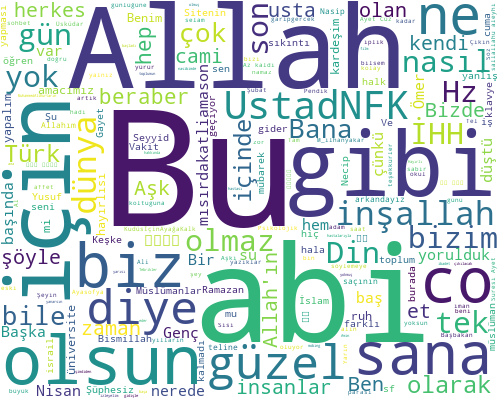

In [13]:
WordCloud(stopwords=STOPWORDS, background_color='white',width=500,height=400).generate(" ".join(tweets['Birlesik Kelimeler'])).to_image()